In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/svgoudar/datasets/refs/heads/main/Algerian_forest_fires_cleaned_dataset.csv')


In [10]:
df.drop(['year','month','day'],axis=1,inplace=True)

In [11]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<Axes: >

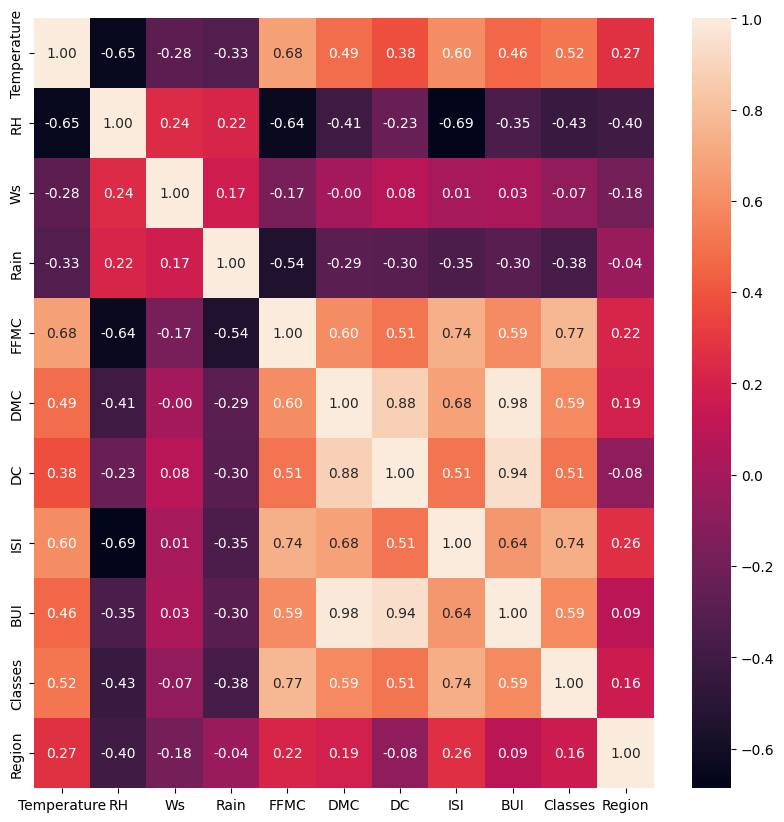

In [19]:
plt.figure(figsize=(10,10))
sbn.heatmap(x.corr(),annot=True,fmt='0.2f')

In [20]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Coefficients and evaluation
print("Linear Regression Coefficients:", linear_model.coef_)
y_pred = linear_model.predict(x_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))


Linear Regression Coefficients: [-0.02274322 -0.01376828 -0.03111917  0.00175696 -0.05989436  0.00825539
 -0.0135561   1.15978004  0.2877755   0.59448039 -0.36467416]
Linear Regression MSE: 0.46514565204621616


In [21]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(x_train, y_train)

# Coefficients and evaluation
print("Ridge Regression Coefficients:", ridge_model.coef_)
y_pred_ridge = ridge_model.predict(x_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression Coefficients: [-0.02271411 -0.01339182 -0.03100819  0.00261475 -0.05887376  0.00988293
 -0.01314097  1.16081771  0.28525127  0.55355984 -0.3523123 ]
Ridge Regression MSE: 0.4654047206592758


In [22]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso_model.fit(x_train, y_train)

# Coefficients and evaluation
print("Lasso Regression Coefficients:", lasso_model.coef_)
y_pred_lasso = lasso_model.predict(x_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression Coefficients: [-0.         -0.00495328 -0.00362989  0.         -0.04592675  0.04623449
 -0.0025143   1.17377507  0.22061518  0.         -0.        ]
Lasso Regression MSE: 0.5010141105897866


C:\Users\sangouda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+01, tolerance: 1.013e+00
  model = cd_fast.enet_coordinate_descent(


[array([-0.02274322, -0.01376828, -0.03111917,  0.00175696, -0.05989436,
        0.00825539, -0.0135561 ,  1.15978004,  0.2877755 ,  0.59448039,
       -0.36467416]), array([-0.02271411, -0.01339182, -0.03100819,  0.00261475, -0.05887376,
        0.00988293, -0.01314097,  1.16081771,  0.28525127,  0.55355984,
       -0.3523123 ]), array([-0.        , -0.00495328, -0.00362989,  0.        , -0.04592675,
        0.04623449, -0.0025143 ,  1.17377507,  0.22061518,  0.        ,
       -0.        ])]


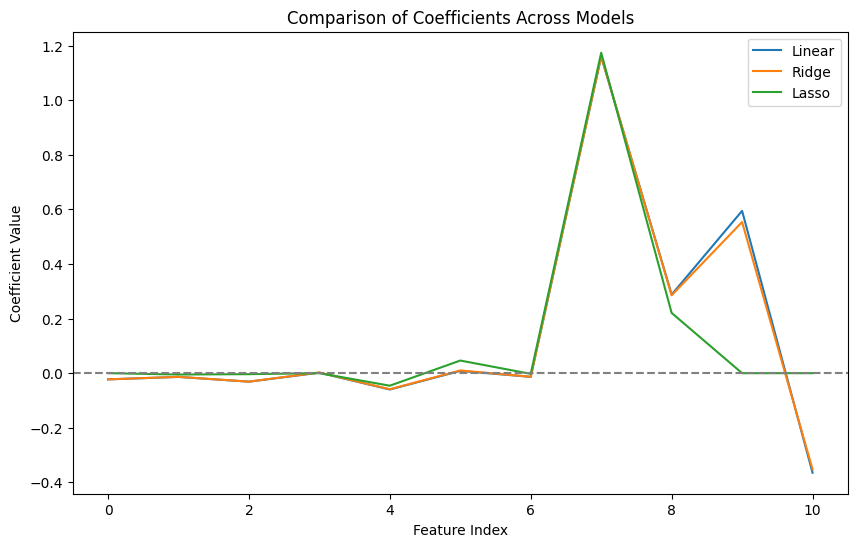

In [24]:
import matplotlib.pyplot as plt

# Plotting coefficients
models = ['Linear', 'Ridge', 'Lasso']
coefficients = [linear_model.coef_, ridge_model.coef_, lasso_model.coef_]
print(coefficients)
plt.figure(figsize=(10, 6))
for i, coef in enumerate(coefficients):
    plt.plot(coef, label=models[i])

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients Across Models")
plt.legend()
plt.show()


In [27]:
correlation_matrix = df.corr()
threshold = 0.7

In [28]:
threshold = 0.7
high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]
print("Highly correlated features (|r| > 0.7):\n", high_corr.dropna(how='all'))

Highly correlated features (|r| > 0.7):
          Temperature  RH  Ws  Rain      FFMC       DMC        DC       ISI  \
FFMC             NaN NaN NaN   NaN       NaN       NaN       NaN  0.740007   
DMC              NaN NaN NaN   NaN       NaN       NaN  0.875925       NaN   
DC               NaN NaN NaN   NaN       NaN  0.875925       NaN       NaN   
ISI              NaN NaN NaN   NaN  0.740007       NaN       NaN       NaN   
BUI              NaN NaN NaN   NaN       NaN  0.982248  0.941988       NaN   
FWI              NaN NaN NaN   NaN       NaN  0.875864  0.739521  0.922895   
Classes          NaN NaN NaN   NaN  0.769492       NaN       NaN  0.735197   

              BUI       FWI   Classes  Region  
FFMC          NaN       NaN  0.769492     NaN  
DMC      0.982248  0.875864       NaN     NaN  
DC       0.941988  0.739521       NaN     NaN  
ISI           NaN  0.922895  0.735197     NaN  
BUI           NaN  0.857973       NaN     NaN  
FWI      0.857973       NaN  0.719216     NaN 

In [30]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

# Coefficients
ridge_coefficients = pd.Series(ridge_model.coef_, index=x.columns)
print("Ridge Coefficients:\n", ridge_coefficients)

# Test set performance
ridge_pred = ridge_model.predict(x_test)
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))


Ridge Coefficients:
 Temperature   -0.022714
RH            -0.013392
Ws            -0.031008
Rain           0.002615
FFMC          -0.058874
DMC            0.009883
DC            -0.013141
ISI            1.160818
BUI            0.285251
Classes        0.553560
Region        -0.352312
dtype: float64
Ridge MSE: 0.4654047206592758


In [31]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

# Coefficients
lasso_coefficients = pd.Series(lasso_model.coef_, index=x.columns)
print("Lasso Coefficients:\n", lasso_coefficients)

# Test set performance
lasso_pred = lasso_model.predict(x_test)
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))


Lasso Coefficients:
 Temperature   -0.000000
RH            -0.004953
Ws            -0.003630
Rain           0.000000
FFMC          -0.045927
DMC            0.046234
DC            -0.002514
ISI            1.173775
BUI            0.220615
Classes        0.000000
Region        -0.000000
dtype: float64
Lasso MSE: 0.5010141105897866


C:\Users\sangouda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+01, tolerance: 1.013e+00
  model = cd_fast.enet_coordinate_descent(


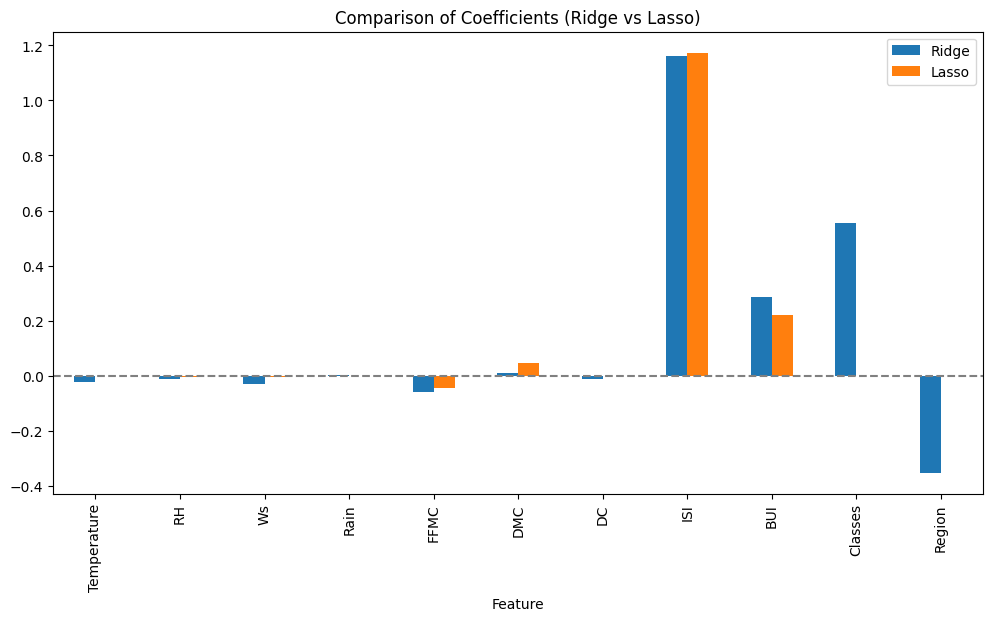

In [32]:
# Plot coefficients
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Ridge': ridge_coefficients,
    'Lasso': lasso_coefficients
}).set_index('Feature')

coeff_df.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Coefficients (Ridge vs Lasso)")
plt.axhline(0, color='gray', linestyle='--')
plt.show()


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/svgoudar/datasets/refs/heads/main/Algerian_forest_fires_cleaned_dataset.csv"
df = pd.read_csv(url)

# Check for null values
df = df.dropna()
df[df.loc[122,:]]
# # Separate features and target
# X = df.drop(columns=["FWI"])  # Assuming 'FWI' is the target variable
# y = df["FWI"]

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# # Compute correlation matrix
# correlation_matrix = X_scaled.corr()

# # Display highly correlated features
# threshold = 0.7  # Threshold for high correlation
# high_corr_features = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)]
# print("Highly correlated features:\n", high_corr_features.dropna(how="all"))

# # Select non-redundant features
# # Removing one feature from each correlated pair based on correlation
# redundant_features = []
# for col in correlation_matrix.columns:
#     if any(correlation_matrix[col].abs() > threshold):
#         redundant_features.append(col)

# # Drop redundant features
# X_reduced = X_scaled.drop(columns=redundant_features, errors='ignore')

# # Split dataset into train and test
# X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# # Fit Ridge and Lasso
# ridge = Ridge(alpha=1.0).fit(X_train, y_train)
# lasso = Lasso(alpha=0.1).fit(X_train, y_train)

# # Plot coefficients after removing correlated features
# features = X_reduced.columns
# ridge_coeffs = ridge.coef_
# lasso_coeffs = lasso.coef_
# # print(features)
# plt.figure(figsize=(10, 15))
# plt.bar(features, ridge_coeffs, alpha=0.6, label='Ridge', width=0.4, align='center')
# plt.bar(features, lasso_coeffs, alpha=0.6, label='Lasso', width=0.4, align='edge')
# plt.axhline(0, color='gray', linestyle='--')
# plt.xticks(rotation=45)
# plt.ylabel("Coefficient Value")
# plt.title("Comparison of Coefficients (Ridge vs Lasso)")
# plt.legend()
# plt.tight_layout()
# plt.show()


KeyError: "None of [Float64Index([   1.0,    6.0, 2012.0,   32.0,   71.0,   12.0,    0.7,   57.1,\n                 2.5,    8.2,    0.6,    2.8,    0.2,    0.0,    1.0],\n             dtype='float64')] are in the [columns]"

Selected Features with Non-Zero Coefficients:
day        0.062546
month      0.022298
RH        -0.070936
Ws        -0.009397
FFMC      -0.646067
DMC        1.255043
ISI        4.843180
BUI        2.237087
Classes    0.152353
Region    -0.117935
dtype: float64

Removed Features with Zero Coefficients:
year           0.0
Temperature   -0.0
Rain           0.0
DC             0.0
dtype: float64

Lasso Model R^2 Score on Test Data: 0.9878


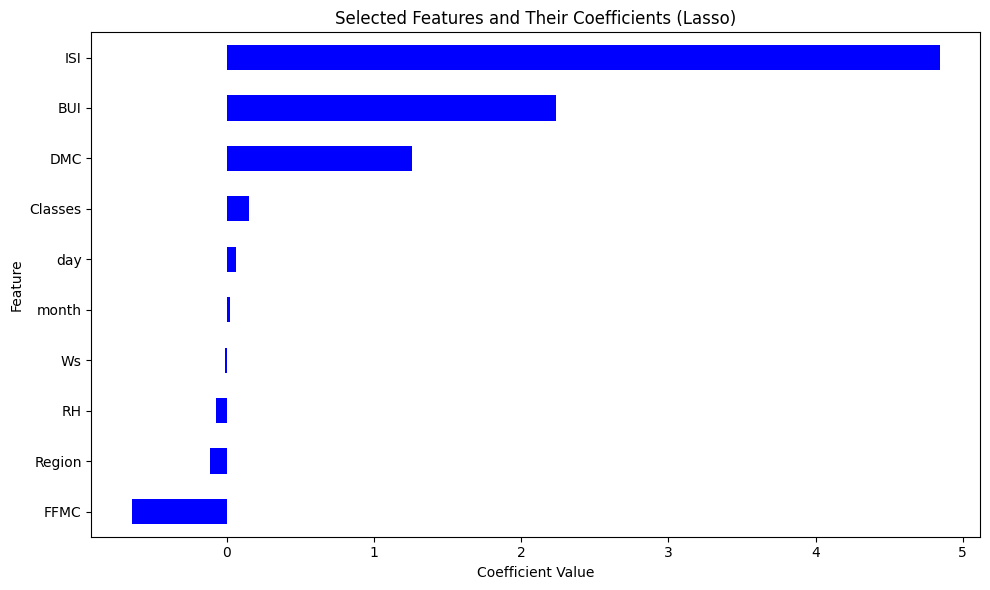

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://raw.githubusercontent.com/svgoudar/datasets/refs/heads/main/Algerian_forest_fires_cleaned_dataset.csv"
df = pd.read_csv(url)

# Drop any missing values
df = df.dropna()

# Separate features and target
X = df.drop(columns=["FWI"])  # Assuming 'FWI' is the target variable
y = df["FWI"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LassoCV for regularization
lasso_cv = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Get the coefficients
lasso_coefficients = pd.Series(lasso_cv.coef_, index=X.columns)

# Display selected features (non-zero coefficients)
selected_features = lasso_coefficients[lasso_coefficients != 0]
print("Selected Features with Non-Zero Coefficients:")
print(selected_features)

# Display removed features (zero coefficients)
removed_features = lasso_coefficients[lasso_coefficients == 0]
print("\nRemoved Features with Zero Coefficients:")
print(removed_features)

# Evaluate performance on test data
lasso_score = lasso_cv.score(X_test, y_test)
print(f"\nLasso Model R^2 Score on Test Data: {lasso_score:.4f}")

# Plot coefficients for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
selected_features.sort_values().plot(kind='barh', color='blue')
plt.title("Selected Features and Their Coefficients (Lasso)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import ad